In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from tqdm import tqdm_notebook

np.set_printoptions(2, suppress=True)

%matplotlib inline

In [2]:
α = 0.4
λ = 0.1
k = 4

A = np.random.random((30, 8))

sparsity = 0.6

f = np.vectorize(lambda x: np.nan if x < sparsity else (x - sparsity)*5/(1-sparsity))
ratings = f(A)
ratings

array([[ nan, 4.99, 0.48,  nan, 1.58,  nan, 0.5 ,  nan],
       [ nan, 2.69,  nan,  nan,  nan,  nan, 1.63,  nan],
       [ nan,  nan,  nan, 0.08,  nan, 0.34,  nan,  nan],
       [1.57,  nan,  nan,  nan, 3.67, 1.78,  nan,  nan],
       [4.32,  nan, 3.69, 1.3 , 2.2 ,  nan,  nan, 1.77],
       [ nan, 0.83, 2.96,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan, 2.25, 4.63,  nan,  nan,  nan],
       [1.45, 0.44, 1.6 ,  nan, 3.28,  nan, 4.68, 4.65],
       [ nan, 1.7 ,  nan, 3.72,  nan,  nan,  nan, 4.14],
       [4.7 ,  nan,  nan, 3.41, 1.09, 2.83,  nan, 0.39],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.04],
       [ nan,  nan, 4.13,  nan, 2.75,  nan, 0.52,  nan],
       [ nan,  nan,  nan, 4.27,  nan, 2.59,  nan,  nan],
       [ nan, 3.74, 1.44, 4.67, 3.03,  nan,  nan,  nan],
       [ nan, 2.55, 0.92,  nan, 2.85,  nan, 4.5 , 4.67],
       [1.84,  nan,  nan,  nan, 3.16,  nan, 0.77, 4.87],
       [ nan, 4.58,  nan, 0.06, 4.52,  nan,  nan,  nan],
       [ nan, 2.24, 3.84, 1.01,

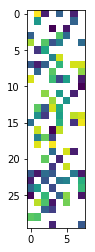

In [3]:
plt.imshow(ratings)

![img](p_ui.png)

In [4]:
A[A < sparsity] = 0

R_ui = (A > 0).astype('int')

R_ui

array([[0, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1]])

![img](confidence.png)

In [5]:
C_ui = 1 + α*A
C_ui

array([[1.  , 1.4 , 1.26, 1.  , 1.29, 1.  , 1.26, 1.  ],
       [1.  , 1.33, 1.  , 1.  , 1.  , 1.  , 1.29, 1.  ],
       [1.  , 1.  , 1.  , 1.24, 1.  , 1.25, 1.  , 1.  ],
       [1.29, 1.  , 1.  , 1.  , 1.36, 1.3 , 1.  , 1.  ],
       [1.38, 1.  , 1.36, 1.28, 1.31, 1.  , 1.  , 1.3 ],
       [1.  , 1.27, 1.33, 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.31, 1.39, 1.  , 1.  , 1.  ],
       [1.29, 1.25, 1.29, 1.  , 1.34, 1.  , 1.39, 1.39],
       [1.  , 1.29, 1.  , 1.36, 1.  , 1.  , 1.  , 1.37],
       [1.39, 1.  , 1.  , 1.35, 1.27, 1.33, 1.  , 1.25],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.24],
       [1.  , 1.  , 1.37, 1.  , 1.33, 1.  , 1.26, 1.  ],
       [1.  , 1.  , 1.  , 1.38, 1.  , 1.32, 1.  , 1.  ],
       [1.  , 1.36, 1.29, 1.39, 1.34, 1.  , 1.  , 1.  ],
       [1.  , 1.32, 1.27, 1.  , 1.33, 1.  , 1.38, 1.39],
       [1.3 , 1.  , 1.  , 1.  , 1.34, 1.  , 1.26, 1.4 ],
       [1.  , 1.39, 1.  , 1.24, 1.38, 1.  , 1.  , 1.  ],
       [1.  , 1.31, 1.36, 1.27,

In [6]:
X = np.random.random((A.shape[0], k)) * 5 / (3 * 5 * 5)
X

array([[0.04, 0.06, 0.06, 0.01],
       [0.02, 0.01, 0.06, 0.03],
       [0.05, 0.03, 0.06, 0.02],
       [0.03, 0.05, 0.01, 0.02],
       [0.04, 0.02, 0.06, 0.  ],
       [0.01, 0.01, 0.05, 0.03],
       [0.  , 0.06, 0.06, 0.06],
       [0.03, 0.06, 0.02, 0.02],
       [0.  , 0.03, 0.02, 0.  ],
       [0.01, 0.  , 0.  , 0.02],
       [0.03, 0.02, 0.  , 0.01],
       [0.07, 0.02, 0.05, 0.01],
       [0.06, 0.05, 0.05, 0.06],
       [0.02, 0.06, 0.03, 0.01],
       [0.01, 0.05, 0.02, 0.03],
       [0.02, 0.03, 0.  , 0.03],
       [0.03, 0.04, 0.05, 0.03],
       [0.02, 0.01, 0.03, 0.06],
       [0.03, 0.04, 0.02, 0.05],
       [0.05, 0.04, 0.06, 0.04],
       [0.06, 0.04, 0.06, 0.07],
       [0.01, 0.04, 0.03, 0.03],
       [0.03, 0.05, 0.  , 0.03],
       [0.02, 0.05, 0.03, 0.01],
       [0.04, 0.03, 0.06, 0.02],
       [0.06, 0.04, 0.05, 0.01],
       [0.01, 0.05, 0.05, 0.03],
       [0.01, 0.06, 0.03, 0.03],
       [0.01, 0.  , 0.04, 0.02],
       [0.02, 0.06, 0.05, 0.  ]])

In [7]:
Y = np.random.random((A.shape[1], k)) * 5 / (3 * 5 * 5)
Y

array([[0.  , 0.02, 0.02, 0.03],
       [0.02, 0.05, 0.06, 0.05],
       [0.05, 0.03, 0.02, 0.05],
       [0.  , 0.06, 0.06, 0.04],
       [0.04, 0.05, 0.06, 0.02],
       [0.  , 0.05, 0.06, 0.05],
       [0.  , 0.  , 0.01, 0.03],
       [0.05, 0.03, 0.07, 0.06]])

![img](x_u.png)

In [8]:
def minimise_x(X):
    X_new = np.zeros(X.shape)
    for (u, x_u) in enumerate(X):
        pu = R_ui[u]
        Cu = np.diag(C_ui[u])
        inv = np.linalg.inv(Y.T @ Cu @ Y + λ*np.eye(Y.shape[1]))
        x_u_new = inv @ Y.T @ Cu @ pu

        X_new[u] = x_u_new
    
    return X_new
        
        
minimise_x(X)

array([[ 1.01,  1.06,  1.25,  1.22],
       [ 0.16,  0.42,  0.69,  0.7 ],
       [-0.12,  0.99,  1.  ,  0.76],
       [ 0.3 ,  1.01,  1.2 ,  0.82],
       [ 1.28,  1.52,  1.68,  1.66],
       [ 0.67,  0.66,  0.62,  0.86],
       [ 0.38,  1.05,  1.01,  0.42],
       [ 1.45,  1.3 ,  1.89,  2.02],
       [ 0.61,  1.16,  1.6 ,  1.29],
       [ 0.67,  1.7 ,  2.15,  1.66],
       [ 0.46,  0.13,  0.55,  0.55],
       [ 0.89,  0.65,  0.69,  0.84],
       [-0.13,  1.06,  1.06,  0.81],
       [ 1.  ,  1.69,  1.61,  1.26],
       [ 1.47,  1.17,  1.8 ,  1.79],
       [ 0.85,  0.7 ,  1.33,  1.21],
       [ 0.55,  1.44,  1.55,  0.82],
       [ 0.64,  1.25,  1.08,  1.18],
       [ 0.14,  1.09,  1.09,  0.77],
       [-0.14,  1.02,  1.17,  1.08],
       [ 0.89,  0.66,  0.56,  0.56],
       [-0.13,  1.03,  1.05,  0.8 ],
       [ 1.01,  1.46,  1.79,  2.18],
       [ 1.21,  1.33,  1.77,  1.78],
       [ 0.59,  1.29,  1.69,  1.52],
       [ 1.2 ,  1.34,  1.76,  1.79],
       [ 0.55,  1.67,  1.65,  1.64],
 

![img](y_i.png)

In [9]:
def minimise_y(Y):
    Y_new = np.zeros(Y.shape)
    for (i, y_i) in enumerate(Y):
        pi = R_ui[:,i]
        Ci = np.diag(C_ui[:,i])
        inv = np.linalg.inv(X.T @ Ci @ X + λ*np.eye(X.shape[1]))
        y_i_new = inv @ X.T @ Ci @ pi

        Y_new[i] = y_i_new
    
    return Y_new
    
minimise_y(Y)

array([[1.83, 1.94, 1.25, 0.61],
       [1.11, 2.61, 2.7 , 2.2 ],
       [2.14, 3.08, 2.63, 1.55],
       [1.72, 3.35, 3.08, 2.78],
       [2.36, 3.43, 2.21, 1.32],
       [1.78, 1.72, 1.6 , 1.31],
       [1.53, 1.84, 1.16, 0.94],
       [1.71, 2.86, 1.38, 0.46]])

![img](cost_function.png)

In [10]:
def cost_fun(A, X, Y):
    _cost = 0
    for u, i in np.ndindex(A.shape):
        c_ui = C_ui[u, i]
        p_ui = R_ui[u, i]
        x_u = X[u]
        y_i = Y[i]
        _cost += c_ui*((p_ui - x_u.T @ y_i)**2)
    _cost += λ*np.sum(np.linalg.norm(X, axis=1))
    _cost += λ*np.sum(np.linalg.norm(Y, axis=1))
    
    return _cost
cost_fun(A, X, Y)

128.16555304593442

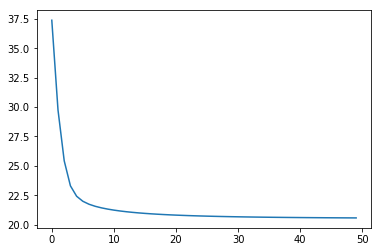

In [11]:
costs = []
for _ in range(50):
    X = minimise_x(X)
    Y = minimise_y(Y)
    cost = cost_fun(A, X, Y)
    costs.append(cost)
    
plt.plot(costs)

In [12]:
X @ Y.T

array([[ 0.08,  0.91,  1.22,  0.04,  0.9 , -0.16,  0.77,  0.08],
       [ 0.03,  0.87,  0.42,  0.11,  0.07, -0.45,  0.44,  0.19],
       [ 0.05, -0.03,  0.09,  1.04,  0.12,  0.8 , -0.29,  0.02],
       [ 0.64, -0.44,  0.37,  0.2 ,  0.86,  0.79,  0.07,  0.49],
       [ 0.9 ,  0.4 ,  0.71,  0.73,  0.95,  0.65,  0.4 ,  0.94],
       [-0.13,  0.84,  0.7 ,  0.28,  0.3 , -0.2 ,  0.43, -0.06],
       [ 0.13,  0.15,  0.47,  0.68,  0.47,  0.58,  0.04,  0.08],
       [ 0.92,  0.94,  1.02,  0.07,  1.05, -0.11,  0.92,  1.06],
       [ 0.42,  0.96,  0.06,  1.02, -0.17,  0.02,  0.18,  0.73],
       [ 1.02, -0.08,  0.27,  0.96,  0.77,  1.04,  0.03,  1.03],
       [ 0.49,  0.09, -0.14,  0.05,  0.03, -0.02,  0.1 ,  0.6 ],
       [ 0.13,  0.3 ,  1.05, -0.22,  1.01,  0.1 ,  0.57, -0.01],
       [ 0.05, -0.03,  0.09,  1.04,  0.12,  0.8 , -0.29,  0.02],
       [-0.  ,  0.94,  1.07,  0.91,  0.69,  0.34,  0.44,  0.03],
       [ 0.58,  0.99,  1.08,  0.08,  0.94, -0.18,  0.87,  0.68],
       [ 1.03,  0.15,  0.

In [13]:
! cat ml-100k/u.info

943 users
1682 items
100000 ratings


In [14]:
cols_raw = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | " + \
"Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western "

cols = [col.strip() for col in cols_raw.split('|')]
cols

pd.read_table('ml-100k/u.item', sep='|', encoding='latin-1', names=cols)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
cols = [col.strip() for col in "user id | item id | rating | timestamp".split('|')]
df = pd.read_table('ml-100k/ua.base', sep='\t', encoding='latin-1', names=cols)
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,user id,item id,rating,timestamp,date
0,1,1,5,874965758,1997-09-22 22:02:38
1,1,2,3,876893171,1997-10-15 05:26:11
2,1,3,4,878542960,1997-11-03 07:42:40
3,1,4,3,876893119,1997-10-15 05:25:19
4,1,5,3,889751712,1998-03-13 01:15:12


In [16]:
ratings_df = df.pivot(index='user id', columns='item id', values='rating')
ratings_df

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


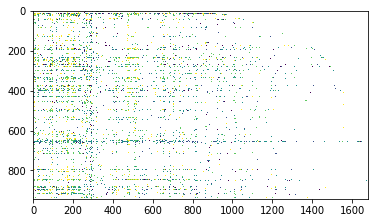

In [17]:
plt.imshow(ratings_df)

In [18]:
class ALSModel:
    def __init__(self, numiter=50):
        self.numiter = numiter
        self.α = 0.4
        self.λ = 10
        self.k = 10

    def _minimise_x(self):
        for u in tqdm_notebook(range(len((self.X))), desc='X '):
            pu = self.R_ui[u]
            Cu = np.diag(self.C_ui[u])
            inv = np.linalg.inv(self.Y.T @ Cu @ self.Y + self.λ*np.eye(self.k))
            x_u_new = inv @ self.Y.T @ Cu @ pu

            self.X[u] = x_u_new
    
    def _minimise_y(self):
        for i in tqdm_notebook(range(len(self.Y)), desc='Y'):
            pi = self.R_ui[:,i]
            Ci = np.diag(self.C_ui[:,i])
            inv = np.linalg.inv(self.X.T @ Ci @ self.X + self.λ*np.eye(self.k))
            y_i_new = inv @ self.X.T @ Ci @ pi

            self.Y[i] = y_i_new
    
    def fit(self, A):
        self.A = A.copy()
        self.R_ui = (~np.isnan(self.A)).astype('int')
        self.C_ui = 1 + self.α*self.R_ui
  
        self.X = np.random.random((self.A.shape[0], self.k))*5
        self.Y = np.random.random((self.A.shape[1], self.k))*5
        for i in range(self.numiter):
            print(f'Iteration {i+1}')
            self._minimise_x()
            self._minimise_y()
        print('Done fitting')
        
    def get_ratings(self):
        return self.X @ self.Y.T

A = np.array(ratings_df)
als = ALSModel(numiter=3)
als.fit(A)

Iteration 1


HBox(children=(IntProgress(value=0, description='X ', max=943), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Y', max=1680), HTML(value='')))


Iteration 2


HBox(children=(IntProgress(value=0, description='X ', max=943), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Y', max=1680), HTML(value='')))


Iteration 3


HBox(children=(IntProgress(value=0, description='X ', max=943), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Y', max=1680), HTML(value='')))


Done fitting


In [19]:
new_A = als.get_ratings()
pd.DataFrame(data=new_A, index=ratings_df.index, columns=ratings_df.columns)

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,1.009629,0.539909,0.444285,0.787369,0.280274,0.110653,0.955477,0.775266,0.568196,3.187876e-01,...,-0.004436,0.005752,0.005161,0.005161,0.008762,-0.003275,-0.003275,-0.003275,0.004056,0.009119
2,0.385995,-0.064681,0.100088,0.057099,-0.024429,0.049720,0.285721,0.108310,0.382086,1.161613e-01,...,0.003364,-0.002882,0.000669,0.000669,0.001360,0.007613,0.007613,0.007613,-0.003341,-0.003159
3,0.036325,0.048711,0.012764,0.028096,0.027718,0.033752,0.083639,0.008851,0.031867,5.059948e-02,...,0.000192,-0.002261,0.004323,0.004323,-0.002403,0.013391,0.013391,0.013391,-0.000497,-0.005561
4,0.056170,0.038490,0.000973,0.020061,0.007067,0.003197,0.052566,0.023556,0.011905,1.063767e-03,...,-0.000066,-0.000485,0.002225,0.002225,-0.000568,0.004707,0.004707,0.004707,-0.000206,-0.002501
5,0.683025,0.363414,0.280125,0.307337,0.141293,-0.013491,0.470111,0.393011,-0.089224,1.784363e-01,...,-0.002213,0.001269,-0.007034,-0.007034,-0.005963,0.000261,0.000261,0.000261,-0.003576,-0.000154
6,0.887260,0.114125,0.137265,0.487233,-0.046146,0.161775,0.707344,0.677678,0.761083,4.109351e-01,...,0.005516,0.014587,0.003692,0.003692,0.012166,-0.001166,-0.001166,-0.001166,0.001008,0.003449
7,0.593562,0.635589,0.113622,0.834595,0.639274,0.089752,0.875031,0.641906,0.531344,3.583033e-01,...,0.007355,0.012882,0.000104,0.000104,-0.002085,0.005064,0.005064,0.005064,0.016976,0.006510
8,0.234744,0.287704,0.017911,0.224286,0.079580,-0.020844,0.238369,0.132973,0.104862,-2.399747e-02,...,0.000629,0.001737,0.008287,0.008287,0.000661,0.002749,0.002749,0.002749,0.006878,-0.000221
9,0.104330,0.011173,0.005171,0.034594,0.023202,-0.000890,0.109933,0.039014,0.072345,4.380862e-03,...,0.000978,0.000466,0.000068,0.000068,0.000452,0.000929,0.000929,0.000929,-0.000189,-0.001026


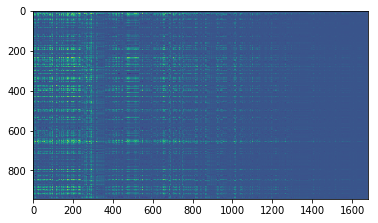

In [20]:
plt.imshow(new_A)